# Báo cáo đồ án giữ kì  
# Artificial Neural Network

MSSV-Họ tên: 22424022 - Trương Bữu Khang   
       
MSSV-Họ tên: 22424023 - Hồ Tuấn Kiệt

# Mô tả thuật toán

Triển khai một cách đơn giản, từ đầu một mạng nơ-ron nhằm phân loại các chữ số viết tay từ tập dữ liệu MNIST. Tập dữ liệu MNIST là một tập dữ liệu tiêu chuẩn được sử dụng trong thị giác máy tính và học sâu để đánh giá các thuật toán phân loại. Mạng này sử dụng một lớp ẩn duy nhất và thực hiện các phương pháp lan truyền xuôi, lan truyền ngược (cho việc học) và đào tạo theo lô. Ngoài ra, nó bao gồm các tiện ích để tải dữ liệu MNIST, tiền xử lý hình ảnh và một hàm dự đoán đơn giản. Hãy phân tích các thành phần và hoạt động thiết yếu của mã này:

`Bộ Nạp và Tiền Xử Lý Dữ Liệu MNIST`

Lớp CMNISTData: Xử lý việc tải và phân tích các tệp dữ liệu MNIST, bao gồm cả hình ảnh và nhãn. Nó hỗ trợ chuyển đổi endian để tương thích trên các hệ thống khác nhau và tiền xử lý các hình ảnh để chuẩn hóa giá trị pixel.
Tiền xử lý hình ảnh tùy chỉnh: Sử dụng OpenCV, hàm PreprocessImage đọc một hình ảnh từ đường dẫn đã cho, thay đổi kích thước của nó thành kích thước tiêu chuẩn của MNIST là 28x28 pixel và chuẩn hóa các giá trị pixel.

`Triển Khai Mạng Nơ-ron`

Lớp CNeuralNetwork: Đại diện cho kiến trúc mạng nơ-ron cơ bản với một lớp ẩn. Nó được templated để tùy chỉnh số lượng nơ-ron đầu vào, nơ-ron ẩn và nơ-ron đầu ra.
Khởi tạo: Khởi tạo ngẫu nhiên trọng số và độ lệch với phân phối Gaussian.
Lan truyền xuôi: Tính toán kích hoạt của từng nơ-ron trong mạng dựa trên dữ liệu đầu vào.
Lan truyền ngược (Học): Điều chỉnh trọng số và độ lệch của mạng sử dụng gradient descent, dựa trên sai số giữa đầu ra dự đoán và đầu ra thực tế.
Đào tạo: Xử lý các lô nhỏ dữ liệu để cập nhật các tham số mô hình lặp đi lặp lại.

`Đào Tạo và Dự Đoán`

Hàm chính điều khiển quá trình tải tập dữ liệu, đào tạo mạng nơ-ron và đánh giá hiệu suất của nó trên cả dữ liệu đào tạo và kiểm tra.
Nó triển khai một tiện ích hẹn giờ đơn giản SBlockTimer để đo thời gian đào tạo.
Sau khi đào tạo, nó trình bày cách tiền xử lý hình ảnh và sử dụng mô hình đã đào tạo để dự đoán nhãn số của hình ảnh chưa thấy.

`Tham khảo`

1. Video “What is Neural Networks”
2. Neural Networks and Deep Learning book
3. Dùng thư viện của openCV để hỗ trợ trong việc load và chuẩn hoá ảnh

# Luồng dữ liệu

Load tập dữ liệu Mnist `->` Chuẩn hoá dữ liệu ma trận ảnh thành vector `->` Khởi tạo mạng Neural Network `->` Huấn luyện dữ liệu `->` Kiểm tra tính đúng đắn sau mỗi lần huấn luyện `->` Đưa vào một bức ảnh là kí tự số viết tay `->` Chuẩn hoá bức ảnh đó thành vector `->` Kiểm tra ảnh đã chuẩn hoá so với mô hình `->` Xử lý và dự đoán kết quả.

# Sử dụng trên google colab

`Đoạn mã này dùng để lấy một hình ảnh ngẫu nhiên tự bộ dữ liệu mnist để dự đoán nó sẽ lưu vào drawn_image.png`

11490434/11490434 [==============================] - 0s 0us/step
Hình ảnh a.png đã được lưu với kích thước 28x28.


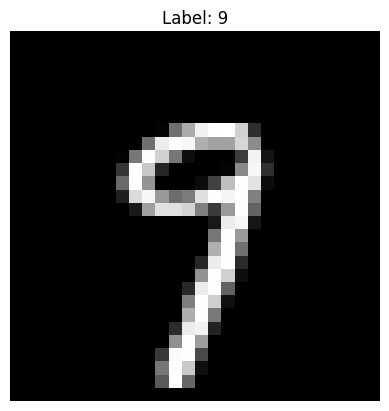

Hình ảnh b.png đã được lưu với kích thước 28x28.


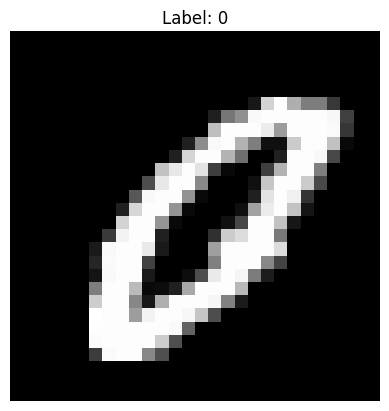

Hình ảnh c.png đã được lưu với kích thước 28x28.


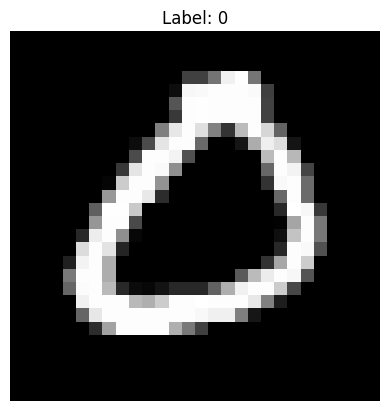

Hình ảnh d.png đã được lưu với kích thước 28x28.


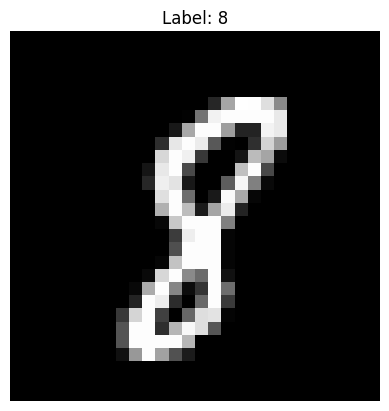

Hình ảnh e.png đã được lưu với kích thước 28x28.


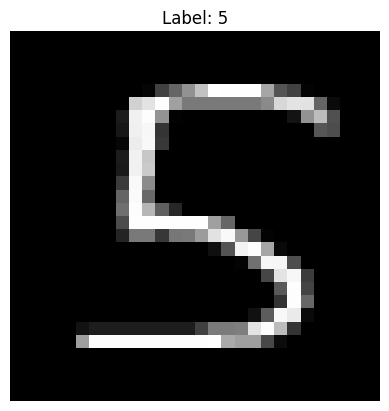

In [5]:
# Import thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from PIL import Image
import string
import os

# Hàm để kiểm tra và tạo các tệp nếu chưa tồn tại
def create_file_if_not_exists(filename):
    if not os.path.exists(filename):
        open(filename, 'a').close()

# Tải bộ dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Ví dụ với 5 hình ảnh
num_images = 5

# Tạo thư mục để lưu ảnh nếu nó không tồn tại
if not os.path.exists("saved_images"):
    os.makedirs("saved_images")

# Tạo các tệp a.png, b.png, c.png, d.png, e.png nếu chúng không tồn tại
for i in range(num_images):
    create_file_if_not_exists(string.ascii_lowercase[i] + ".png")

# Lặp qua từng hình ảnh
for i in range(num_images):
    # Chọn một hình ảnh ngẫu nhiên từ tập dữ liệu
    random_index = np.random.randint(0, x_train.shape[0])

    # Hiển thị hình ảnh
    plt.imshow(x_train[random_index], cmap='gray')
    plt.title(f'Label: {y_train[random_index]}')
    plt.axis('off')

    # Chỉnh kích thước hình ảnh thành 20x20
    img = Image.fromarray(x_train[random_index])
    img = img.resize((28, 28))

    # Tạo tên file dựa trên các ký tự trong bảng chữ cái
    filename = string.ascii_lowercase[i] + ".png"

    # Lưu hình ảnh có kích thước 20x20 với tên 'drawn_image.png'
    img.save(filename)

    # Hiển thị thông báo hoàn thành
    print(f"Hình ảnh {filename} đã được lưu với kích thước 28x28.")
    # Nếu bạn muốn hiển thị hình ảnh trực tiếp trên notebook sau khi lưu, thực hiện plt.show() sau plt.savefig()
    plt.show()

`Cài đặt thư viện openCV`

In [43]:
!apt-get -qq install -y libopencv-dev

`Chạy file kernel.cu trong đó sử dụng package của openCV`

In [14]:
!nvcc -o output kernel.cu `pkg-config --cflags --libs opencv4` -diag-suppress 611

`Quá trình hiển thị kết quả mất khoảng 30 giây, mô hình có khả năng dự đoán đúng 85% nếu sai sót vui lòng random lại bức ảnh khác và chạy lại đoạn mã`

In [16]:
! ./output

Kernel: 
Kernel 0: Load mnist by host 
Kernel 1: Load mnist by device 
Kernel 2: Load mnist by SMEM 
Kernel 3: Load mnist by CMEM 
Kernel 4: Compare host and kernel 
4
Load MNIST on Host
Kernel 1: Load MNIST on Device
Kernel 2: Load MNIST on Device by SMEM 
Kernel 3: Load MNIST on Device by CMEM 
Host time: 368.653687 ms
Kernel 1 time: 106.277924 ms
Kernel 2 time: 102.710526 ms
Kernel 3 time: 102.576447 ms
CNeuralNetwork is training!!!
Training epoch 1 / 5...
Training Data Accuracy: 73.59%
Test Data Accuracy: 72.34%

Training epoch 2 / 5...
Training Data Accuracy: 75.40%
Test Data Accuracy: 73.62%

Training epoch 3 / 5...
Training Data Accuracy: 76.61%
Test Data Accuracy: 74.81%

Training epoch 4 / 5...
Training Data Accuracy: 76.99%
Test Data Accuracy: 74.95%

Training epoch 5 / 5...
Training Data Accuracy: 83.73%
Test Data Accuracy: 81.04%


Final Training Data Accuracy: 83.73%
Final Test Data Accuracy: 81.04%

Predict image a.png is: 7
Predict image b.png is: 0
Predict image c.png i

`Mô hình được huấn luyện 5 lần để giảm thiểu mất mát và cải thiện hiệu suất`